In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip
import json

In [2]:
with gzip.open('output_10k_lima_imp_00.json.gz') as f:
    data = json.load(f)

if data is not None:
    print('Lectura de archivo existosa')
else:
    print('Error de archivo')

Lectura de archivo existosa


In [4]:
data.get('Output').get('Event_0')

{'InputFlux': {'ID': 22,
  'Position': [56.172340862429564, -270.2770582974877, 1500.0],
  'Momentum': [25.378600000000002, -20.3323, -18.980400000000003]},
 'Detector_0': {'EnergyDeposit': 0.0,
  'OptDevice_0': {'Charge': 36,
   'PETimeDistribution': [4.04945074139831e-09,
    2.7356455153938837e-09,
    4.1206277974133554e-08,
    1.0463282639883757e-08,
    7.18296641981419e-09,
    4.255794859724271e-08,
    2.166718827890282e-08,
    6.036242763623119e-08,
    6.64970858013564e-09,
    8.194797642154851e-09,
    1.6919905322780643e-08,
    7.517753389288873e-08,
    2.2358488856832683e-08,
    4.7969122377356225e-08,
    1.142776512530322e-08,
    6.7685473110013315e-09,
    3.229706229046914e-09,
    3.450143657244094e-09,
    9.126085886257439e-09,
    1.2482039090832329e-08,
    1.5839793587918222e-08,
    2.544595712724959e-08,
    2.0585580038996664e-08,
    2.9642590922812327e-09,
    6.960413523497319e-09,
    3.195791025679792e-08,
    2.938746389768675e-09,
    2.88207746

In [43]:
def loadData(file):
    with gzip.open(file) as f:
        data = json.load(f)
    output = data.get('Output')
    df = pd.DataFrame()
    Particle_id = []
    x=[]; y=[]; z=[]
    px=[]; py=[]; pz=[]
    e_dep=[]; cha=[]; pe=[]
    for event_key, event_data in output.items():
        for data_key, data_info in event_data.items():
            if data_key.startswith('InputFlux'):
                Particle_id.append(data_info.get('ID'))
                x_pos, y_pos, z_pos = data_info.get('Position')
                x.append(x_pos); y.append(y_pos); z.append(z_pos)
                x_p, y_p, z_p = data_info.get('Momentum')
                px.append(x_p); py.append(y_p); pz.append(z_p)
            if data_key.startswith('Detector_0'):
                e_dep.append(data_info.get('EnergyDeposit'))
                for opt_key, opt_data in data_info.items():
                    if opt_key.startswith('OptDevice_0'):
                        cha.append(opt_data.get('Charge'))
                        pe.append(opt_data.get('PETimeDistribution'))
                
    df['ID'] = Particle_id
    df['x'] = x; df['y'] = y; df['z'] = z
    df['px'] = px; df['py'] = py; df['pz'] = pz
    df['E_dep'] = e_dep
    df['Charge'] = cha
    df['Pe_Dist'] = pe
    return df

In [46]:
df_00 = loadData('output_10k_lima_imp_00.json.gz')
df_02 = loadData('output_10k_lima_imp_02.json.gz')
df_04 = loadData('output_10k_lima_imp_04.json.gz')
df_06 = loadData('output_10k_lima_imp_06.json.gz')
df_08 = loadData('output_10k_lima_imp_08.json.gz')
df_00

,ID,x,y,z,px,py,pz,E_dep,Charge,Pe_Dist
0,22,56.172341,-270.277058,1500.0,25.378600,-20.332300,-18.980400,0.00000,36,"[4.04945074139831e-09, 2.7356455153938837e-09,..."
1,22,-431.732031,-36.602043,1500.0,38.794900,-31.695700,-29.251400,0.00000,40,"[1.8921752629544343e-08, 2.1043660432113657e-0..."
2,22,239.053325,311.524190,1500.0,72.070700,-58.929200,-54.975400,0.00000,0,[]
3,22,148.845778,-370.474398,1500.0,11.566300,-9.824900,-8.500970,0.00000,0,[]
4,22,500.006050,1.024149,1500.0,0.077414,0.005403,-0.343078,0.00000,0,[]
...,...,...,...,...,...,...,...,...,...,...
9995,2112,196.564568,-177.047849,1500.0,-191.903000,-60.367800,-344.022000,0.00000,2,"[0.0001253536169290981, 3.0751457685308145e-08]"
9996,22,-486.922183,217.745378,1500.0,-6.956450,-5.856790,-16.332700,0.00000,0,[]
9997,22,-398.587237,-89.251507,1500.0,1.793200,0.475232,-0.840156,0.00000,2,"[5.7008169163369734e-08, 4.259814425567109e-09]"
9998,11,-223.061202,-178.684024,1500.0,7.598500,-1.688480,-11.586900,5.64233,12,"[1.0698248222354627e-09, 1.0759578495327976e-0..."


In [69]:
def PlotChargeHistogram(df, color, label):
    Min = 0
    Max = 1000
    sample = 10
    bins = np.arange(Min,Max+1,sample)
    cha = []
    for charge in df['Charge']:
        if charge != 0: cha.append(charge)
    histogram, bins = np.histogram(cha, bins=bins)
    plt.stairs(histogram, bins, color = color, label = label)

Text(0, 0.5, 'Counts')

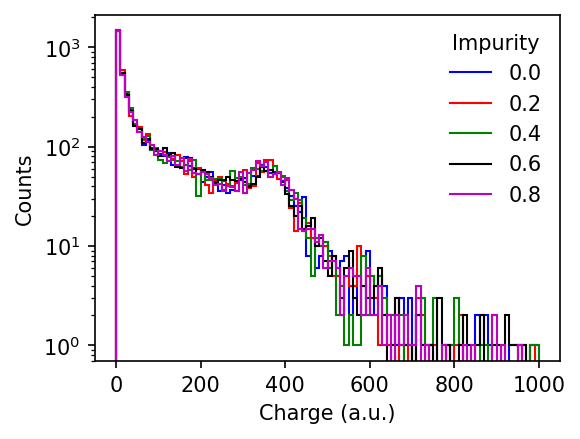

In [78]:
plt.figure(figsize=(4,3), dpi=150)
PlotChargeHistogram(df_00,'b','0.0')
PlotChargeHistogram(df_02,'r','0.2')
PlotChargeHistogram(df_04,'g','0.4')
PlotChargeHistogram(df_06,'k','0.6')
PlotChargeHistogram(df_08,'m','0.8')
plt.yscale('log')
plt.legend(title='Impurity',frameon=False)
plt.xlabel('Charge (a.u.)')
plt.ylabel('Counts')

In [84]:
def PlotEnergyDeposited(df,color,label):
    Min = 0
    Max = 500
    sample = 10
    bins = np.arange(Min,Max+1,sample)
    edep = []
    for energy in df['E_dep']:
        if energy > 0: edep.append(energy)
    histogram, bins = np.histogram(edep, bins=bins)
    plt.stairs(histogram, bins, color = color, label = label)

Text(0, 0.5, 'Counts')

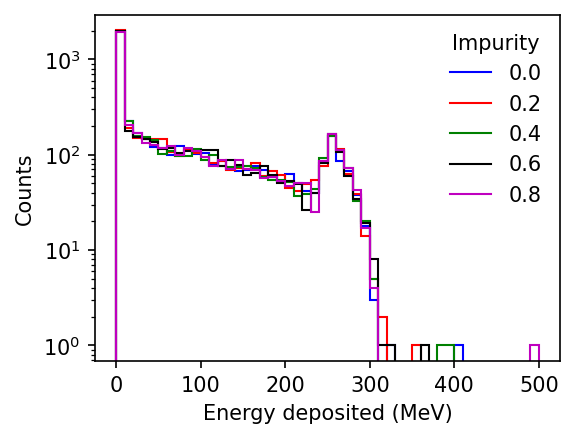

In [88]:
plt.figure(figsize=(4,3), dpi=150)
PlotEnergyDeposited(df_00,'b','0.0')
PlotEnergyDeposited(df_02,'r','0.2')
PlotEnergyDeposited(df_04,'g','0.4')
PlotEnergyDeposited(df_06,'k','0.6')
PlotEnergyDeposited(df_08,'m','0.8')
plt.legend(title='Impurity',frameon=False)
plt.yscale('log')
plt.xlabel('Energy deposited (MeV)')
plt.ylabel('Counts')

In [116]:
def PlotMeanPulse(df,color,label):
    pulse_mean = []
    pe_list = []
    Min=0
    Max=250
    sample=10
    
    for charge,signal in zip(df['Charge'],df['Pe_Dist']):
        if charge != 0: pe_list.append(signal)
            
    
    bins = np.arange(Min, Max+1, sample)
    pulse_cumulate = np.zeros((len(bins)-1))
    counter = 0
    for times in pe_list:
        pulse, bins = np.histogram(np.array(times)*1e9, bins=bins)
        pulse_cumulate += pulse
        counter += 1
    
    plt.stairs(pulse_cumulate/counter, bins, color=color, label=label)
        

Text(0, 0.5, 'No of Photoelectrons')

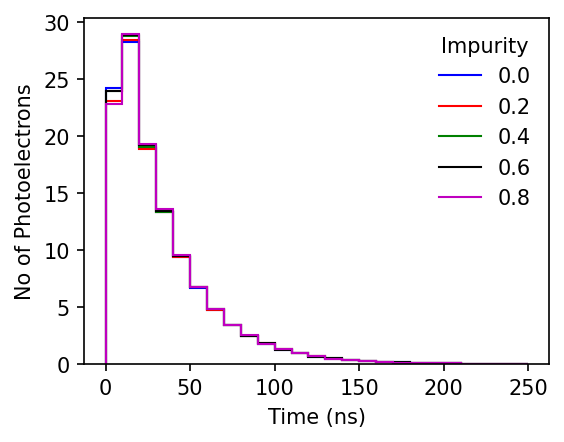

In [118]:
plt.figure(figsize=(4,3), dpi=150)
PlotMeanPulse(df_00,'b','0.0')
PlotMeanPulse(df_02,'r','0.2')
PlotMeanPulse(df_04,'g','0.4')
PlotMeanPulse(df_06,'k','0.6')
PlotMeanPulse(df_08,'m','0.8')
plt.legend(title='Impurity', frameon=False)
plt.xlabel('Time (ns)')
plt.ylabel('No of Photoelectrons')

In [92]:
df_00[df_00['Charge']!=0]

,ID,x,y,z,px,py,pz,E_dep,Charge,Pe_Dist
0,22,56.172341,-270.277058,1500.0,25.37860,-20.332300,-18.980400,0.000000,36,"[4.04945074139831e-09, 2.7356455153938837e-09,..."
1,22,-431.732031,-36.602043,1500.0,38.79490,-31.695700,-29.251400,0.000000,40,"[1.8921752629544343e-08, 2.1043660432113657e-0..."
5,22,152.446284,206.179301,1500.0,-0.20728,-0.757744,-0.352482,0.000058,1,[3.9632070317391745e-08]
6,22,-11.389213,123.706537,1500.0,9.05155,-7.237800,-6.993350,0.000000,11,"[6.981065199325014e-08, 4.2978536239540664e-09..."
9,22,-547.629270,106.031148,1500.0,1.24558,-0.890440,-0.889553,0.000000,1,[2.515957968410147e-07]
...,...,...,...,...,...,...,...,...,...,...
9994,22,185.442292,-388.939632,1500.0,28.05420,22.436500,-54.226500,0.000000,68,"[4.2758559004613105e-09, 5.5374339013818796e-0..."
9995,2112,196.564568,-177.047849,1500.0,-191.90300,-60.367800,-344.022000,0.000000,2,"[0.0001253536169290981, 3.0751457685308145e-08]"
9997,22,-398.587237,-89.251507,1500.0,1.79320,0.475232,-0.840156,0.000000,2,"[5.7008169163369734e-08, 4.259814425567109e-09]"
9998,11,-223.061202,-178.684024,1500.0,7.59850,-1.688480,-11.586900,5.642330,12,"[1.0698248222354627e-09, 1.0759578495327976e-0..."
